在进行绘图时，在Ipython中会自动打开一个窗口显示绘图，而要在Jupyter NoteBook中显示绘图，需先执行以下命令：
> %matplotlib notebook

## 1. 图象对象Figure和Subplot
- matplotlib的图像都位于一个画板对象中，这个画板还不能直接绘图，需要再画板建立子画板，然后在子画板上进行绘图
- 画板对象就是Figure对象，可以使用`plt.figure()`进行创建；子画板是Subplot对象，在Figure对象上使用`add_subplot()`来创建一个或多个Subplo对象
- 在使用`plt.plot()`进行绘图时，如果还没有创建Subplot对象或者Figure对象，则会自动建立Figure对象和Subplot对象；如果已经创建了对象，或创建了多个Subplot对象，则会在最后一个Subplot对象上绘图
- 使用Subplot对象调用`plot()`方法可以在该Subplot对象上进行绘图  
  
`add_subplot(x,y,z)` 创建subplot，将画板分为x行y列，z为新建的subplot所在位置（z不能大于x*y），(2,3,4)表示将画板划分为2行3列，子画板位于第4个位置（从左至右、从上往下顺序），可以简写为(234)

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


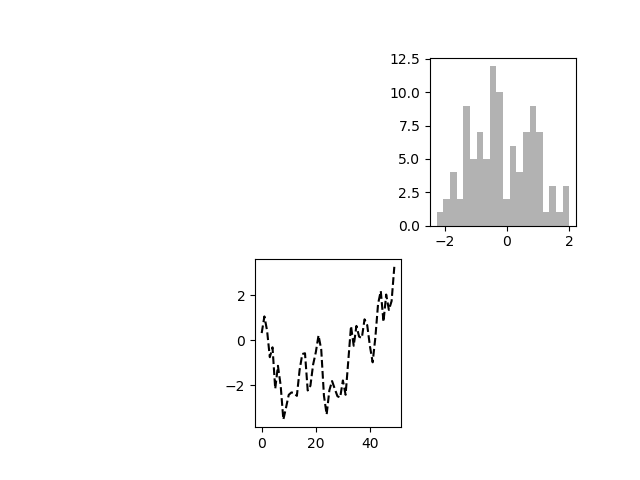

In [3]:
# 建立一个figure
fig=plt.figure()

In [4]:
# figure分为2行3列，在第3个位置建立一个subplot
ax1=fig.add_subplot(233)

In [5]:
# 再建立第二个subplot
ax2=fig.add_subplot(235)

In [6]:
# 使用plot绘图时，默认使用最后一个用过的subplot
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [7]:
# 在ax1里绘图
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

(array([ 1.,  2.,  4.,  2.,  9.,  5.,  7.,  5., 12., 10.,  2.,  6.,  4.,
         7.,  9.,  7.,  1.,  3.,  1.,  3.]),
 array([-2.2587315 , -2.04545271, -1.83217393, -1.61889514, -1.40561635,
        -1.19233756, -0.97905877, -0.76577998, -0.55250119, -0.3392224 ,
        -0.12594361,  0.08733518,  0.30061397,  0.51389276,  0.72717155,
         0.94045034,  1.15372913,  1.36700792,  1.5802867 ,  1.79356549,
         2.00684428]),
 <a list of 20 Patch objects>)

`plt.subplots(x,y)` 直接创建一个包含x*y个Subplot的Figure，并返回Figure和包含Subplot的Numpy数组对象，该数组里的Subplot可以直接使用索引方式来访问

<IPython.core.display.Javascript object>


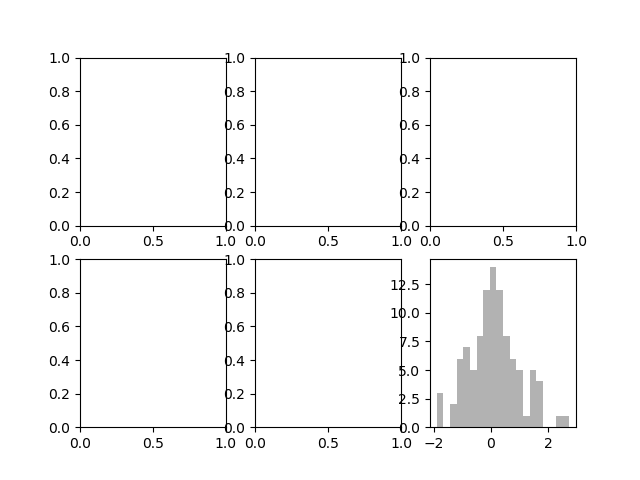

In [8]:
# 创建一个包含2行3列subplot的figure，axes是包含Subplot的Numpy数组对象
fig,axes=plt.subplots(2,3)

In [9]:
# 直接使用索引方式可以访问axes里的subplot，axes[1,2]表示第2行第3个subplot
axes[1,2].hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

(array([ 3.,  0.,  2.,  6.,  7.,  5.,  8., 12., 14., 12.,  8.,  6.,  5.,
         1.,  5.,  4.,  0.,  0.,  1.,  1.]),
 array([-1.90404231, -1.6711966 , -1.4383509 , -1.20550519, -0.97265948,
        -0.73981377, -0.50696807, -0.27412236, -0.04127665,  0.19156905,
         0.42441476,  0.65726047,  0.89010617,  1.12295188,  1.35579759,
         1.58864329,  1.821489  ,  2.05433471,  2.28718041,  2.52002612,
         2.75287183]),
 <a list of 20 Patch objects>)

**subplots参数说明**
![title](img/subplot.png)

## 2. Subplot布局调整
`subplots_adjust()` 调整subplot的布局  
参数  
- `left` `right` `bottom` `top` 分别指定subplots的左右下上的位置百分比
- `wspace` `hspace` 指定subplot之间间距的宽度和高度百分比

<IPython.core.display.Javascript object>


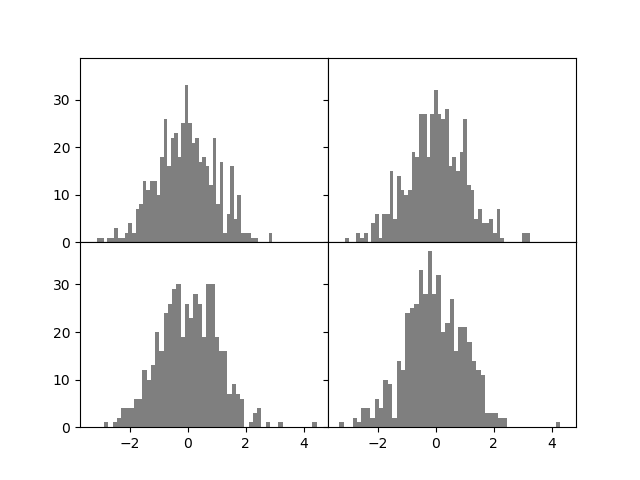

In [10]:
# 创建一个2*2的绘图区域，sharex，sharey表示所有subplot使用相同的X和Y轴刻度
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
# 循环访问每个subplot并绘图
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

In [11]:
# 设置subplot之间高度和宽度均为0
plt.subplots_adjust(wspace=0, hspace=0)

## 3. 颜色、标记、线型和图例
`plot()`方法可以通过参数来自定义显示的颜色、标记、线型，可通过`plt.plot?`来查阅各项的可用值  
- `color` 颜色，可以使用颜色缩写，也可以使用颜色码如`#CCFF00`
- `marker` 标记，每个数据点的标记样式，可以使用文字描述也可以使用符号定义
- `linestyle` 线型
> 颜色、标记、线型可根据需要不设置或者设置一项或多项  
这3样设置也可以缩写在一个字符串内，顺序为'颜色标记线型'，如`ro--`表示`color='r',marker='o',linestyle='--'`

- `label` 标签，可在图例中显示

`legend()` 显示plot图例，参数`loc`用来指定图例显示位置，可使用文字描述或对应的数字代码，默认`upper right`，使用`best`会自动选择最佳位置

<IPython.core.display.Javascript object>


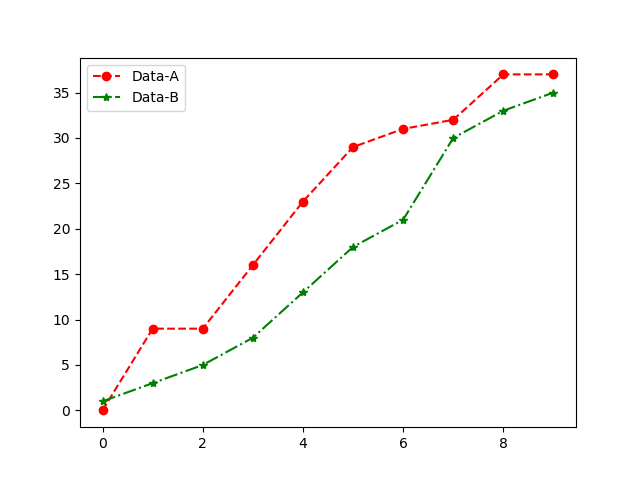

In [12]:
fig=plt.figure()
ax=fig.add_subplot(111)

In [13]:
# 该设置等价于ax.plot(np.random.randint(10, size=10).cumsum(),'ro--')
ax.plot(np.random.randint(10, size=10).cumsum(), color='r',
        marker='o', linestyle='--', label='Data-A')

In [14]:
# 再添加一个Data-B
ax.plot(np.random.randint(10, size=10).cumsum(), 'g*-.', label='Data-B')

In [15]:
# 显示图例
ax.legend(loc='best')

## 4. 刻度、标签和图例
主要有两种方法，一种是使用pyplot接口的方法，另外一种是使用subplot对象的方法。  
**pyplot接口方法**  
- `xlim()` 控制x轴刻度范围，使用数组表示范围
- `xticks()` x轴刻度标签位置，使用数组表示每个标签的位置
- `xticklabels()` x轴刻度标签内容，使用数组表示每个标签内容 
> 方法中带参数表示按参数值对相应项目进行设置，不带参数表示返回该项目的设置值

**subplot对象方法（建议使用该方法）**  
- `get_xlim()` `set_xlim()` 获取或设置x轴刻度范围
- `get_xticks()` `set_xticks()` 获取或设置x轴刻度标签位置
- `get_xticklabels()` `set_xticklabels()` 获取或设置x轴刻度标签内容
    - `set_xticklabels()`的参数：`rotation` 标签倾斜角度, `fontsize` 标签文字大小
- `get_xlabel()` `set_xlabel` 获取或设置x轴的标签（非刻度标签）
- `get_title()` `set_title()` 获取或设置图标标题
- `set(**props)` 使用集合props批量进行多个项目设置
> 以上所有方法都是针对x轴进行设置，如果需要对y轴设置，只需把方法名中的`x`替换为`y`即可  
**注意：**如果使用`plt.subplots()`创建一组subplots，且设置了`sharex=True`或`sharey=True`，那么针对任意subplot的轴设置均会影响到其他subplots的轴。

<IPython.core.display.Javascript object>


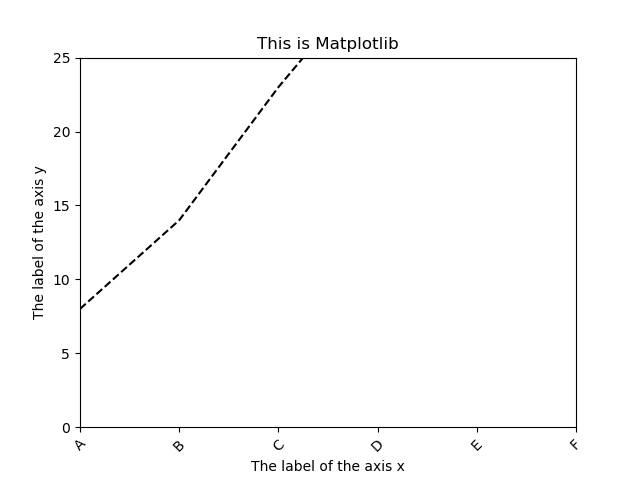

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(np.random.randint(10,size=5).cumsum(), 'k--')

In [17]:
# 使用pyplot接口获取x，y轴范围
print('图形的x轴范围是%s，y轴范围是%s'%(str(plt.xlim()),str(plt.ylim())))

图形的x轴范围是(-0.2, 4.2)，y轴范围是(6.85, 32.15)


In [18]:
# 使用subplot对象方法设置x，y轴范围
ax.set_xlim([0,5])
ax.set_ylim([0,25])

(0, 25)

In [19]:
# 设置x轴标签所显示的位置
ax.set_xticks([0,2.5,5])

In [20]:
# 设置x轴刻度标签内容，若内容数量大于标签位置的数量，多出的标签就不显示
# 同时设置刻度标签倾斜度为45°，字体大小为10
ax.set_xticklabels(list('ABCDEF'),rotation=45,fontsize=10)

[Text(0,0,'A'), Text(0,0,'B'), Text(0,0,'C')]

In [21]:
# 使用set()同时设置多个项目
props={
    'title':'This is Matplotlib',
    'xlabel':'The label of the axis x',
    'ylabel':'The label of the axis y',
    'xticks':[0,1,2,3,4,5],
    'xticklabels':list('ABCDEF')
}
ax.set(**props)

[Text(0,0.5,'The label of the axis y'),
 [Text(0,0,'A'),
  Text(0,0,'B'),
  Text(0,0,'C'),
  Text(0,0,'D'),
  Text(0,0,'E'),
  Text(0,0,'F')],
 Text(0.5,0,'The label of the axis x'),
 Text(0.5,1,'This is Matplotlib')]

## 5. 添加注释
`text()` 在指定位置添加文字
- `x` `y`：添加文字的坐标值，指文字左下角的坐标
- `s`：添加的文字字符串
- `family`：字体
- `fontsize`：字体大小

`annotate()` 添加注释，注释由文字和箭头两部分组成，更多设置请查看文档
- `label`：注释内容
- `xy`：注释坐标，箭头的最下端坐标
- `xytext`：注释文本坐标，文本左下角坐标
- `arrowprops`：箭头样式，字典格式，箭头长度是根据xy和xytext两个坐标计算出来的
- `horizontalalignment` `verticalalignment`：对齐方式


<IPython.core.display.Javascript object>


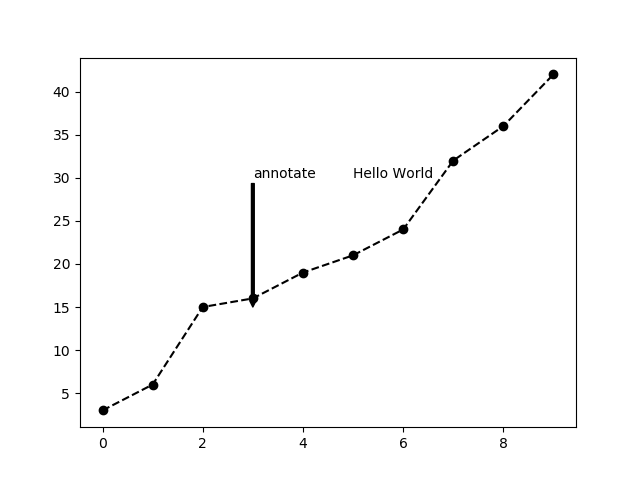

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(np.random.randint(10,size=10).cumsum(), 'ko--')

In [23]:
# 添加文本
ax.text(5,30,'Hello World')

Text(5,30,'Hello World')

In [24]:
# 添加注释
ax.annotate('annotate', xy=(3, 15), xytext=(3, 30), arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                                                    headlength=4), horizontalalignment='middle')

Text(3,30,'annotate')

## 6. 绘制图形
图形对象被称为块（patch），部分图形在`matplotlib.pyplot`中可以找到，但完整的图形集合位于`matplotlib.patches`中。  
绘制图形的步骤，先创建一个块对象shp，然后通过`ax.add_patch(shp)`将图形添加到subplot中。  
- `plt.Rectangle()`：绘制矩形
- `plt.Circle()`：绘制圆形
- `plt.Polygon()`：绘制多边形
- `ax.add_patch()`：将图像添加到subplot中

<IPython.core.display.Javascript object>


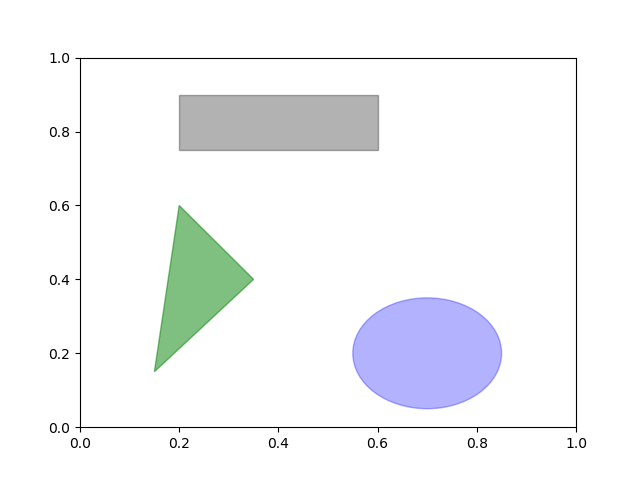

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [26]:
# 创建3种图形的块对象
# 也可使用matplotlib.patches.Rectangle()来创建对象，matplotlib.patches包含更多图形
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

In [27]:
# 将块对象添加到subplot中
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 7. 保存图形
`plt.savefig()` 将图形保存到指定路径和指定文件名及文件格式
- 文件类型是通过后缀名推断出来的
- `dpi`：每英寸点数，分辨率
- `bbox_inches='tight`：裁剪图形周围空白
- 图形也可以保存到其他任何文件型对象中

![title](img/savefig.png)

In [28]:
plt.savefig('img/save_fig.png',dpi=400, bbox_inches='tight')

In [29]:
# 将图形保存为pdf文件
plt.savefig('img/save_fig.pdf')

In [30]:
# 将图形保存到BytesIO中
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

## 8. matplotlib配置
`plt.rc()` 对matplotlib进行自定义配置
- 第一个参数是希望配置的对象，如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等
- 后面可以跟上一系列配置对象相关的关键字参数
- 可以将关键字参数写成一个字典传入`plt.rc()`中
- 关于全部参数，可查阅matplotlib的配置文件matplotlibrc（位于matplotlib/mpl-data目录中）
- 也可以修改matplotlibrc配置文件，将其放在自己的.matplotlibrc目录，每次使用matplotlib时会自动加载，无需再次配置

In [31]:
# 将全局的图像默认大小设置为10×10
plt.rc('figure', figsize=(10,10))

In [32]:
# 使用字典一次配置多个参数
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 10}
plt.rc('font', **font_options)